In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print(tf.VERSION)
print(keras.__version__)

1.12.0
2.1.6-tf


In [3]:
letters_mnist = keras.datasets.mnist

In [5]:
(test_images, test_labels), (train_images, train_labels) = letters_mnist.load_data()

In [11]:
train_images.shape

(10000, 28, 28)

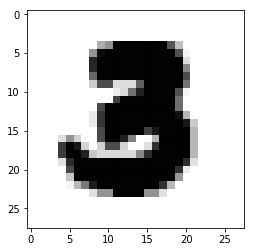

In [17]:
plt.imshow(train_images[200], cmap='binary')

In [24]:
output_labels = list(sorted(set(train_labels)))


In [30]:
train_images = train_images / 255.0
test_images = test_images / 255.0

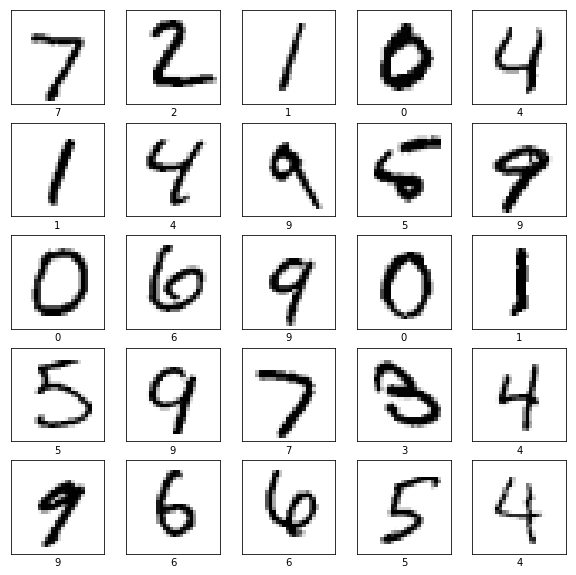

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(train_labels[i])

In [34]:
model=keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

In [38]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              #loss='mean_squared_error',
             metrics=['accuracy'])

In [39]:
model.fit(train_images, train_labels, epochs=2)

ValueError: Error when checking target: expected dense_1 to have shape (10,) but got array with shape (1,)